In [28]:
import glob
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, metrics
import random
import os

File_Path = "Test_data.h5"

h5= h5py.File(File_Path,'r')
stack=h5['data'][:,:]

data = stack[:,:-1813]/100
x_data= data.reshape(-1,data.shape[1],1)
y_data = data[:, -5]

In [19]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, metrics

latent_dim= 2

drop_rate= 0.2
drop_rate_2= 0.4
initializer = keras.initializers.glorot_uniform()

encoder_inputs = keras.Input(shape=(8192, 1))

c1=layers.Conv1D(filters=16, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(encoder_inputs)
p1=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c1)
p1=layers.Dropout(rate=drop_rate)(p1)
c2=layers.Conv1D(filters=16, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p1)
p2=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c2)
p2=layers.Dropout(rate=drop_rate)(p2)
c3=layers.Conv1D(filters=32, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p2)
p3=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c3)
p3=layers.Dropout(rate=drop_rate)(p3)
c4=layers.Conv1D(filters=32, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p3)
p4=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c4)
p4=layers.Dropout(rate=drop_rate)(p4)
c5=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p4)
p5=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c5)
p5=layers.Dropout(rate=drop_rate)(p5)
c6=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p5)
p6=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c6)
p6=layers.Dropout(rate=drop_rate)(p6)
c7=layers.Conv1D(filters=128, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p6)
p7=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c7)
p7=layers.Dropout(rate=drop_rate)(p7)
c8=layers.Conv1D(filters=128, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p7)
p8=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c8)
p8=layers.Dropout(rate=drop_rate)(p8)
c9=layers.Conv1D(filters=256, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p8)
p9=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c9)
p9=layers.Dropout(rate=drop_rate)(p9)
c10=layers.Conv1D(filters=256, kernel_size=3, strides=1,padding='same', activation=tf.keras.layers.LeakyReLU(), 
                        kernel_initializer=initializer)(p9)
p10=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c10)
p10=layers.Dropout(rate=drop_rate)(p10)
c11=layers.Conv1D(filters=512, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p10)
p11=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c11)
p11=layers.Dropout(rate=drop_rate)(p11)
c12=layers.Conv1D(filters=512, kernel_size=3, strides=1,padding='same',activation=tf.keras.layers.LeakyReLU(), 
                         kernel_initializer=initializer)(p11)
p12=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c12)
p12=layers.Dropout(rate=drop_rate_2)(p12)
c13=layers.Conv1D(filters=64, kernel_size=3, strides=1,padding='same', kernel_initializer=initializer)(p12)
p13=layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(c13)
p13=layers.Dropout(rate=drop_rate_2)(p13)

c14=layers.Conv1D(filters=7, kernel_size=1, strides=1,padding='same', kernel_initializer=initializer)(p13)
f1= layers.Flatten()(c14)


encoder = keras.Model(encoder_inputs, f1, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 8192, 1)]         0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 8192, 16)          64        
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 4096, 16)          0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 4096, 16)          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 4096, 16)          784       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 2048, 16)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 2048, 16)          0   

In [21]:
input_mlp = keras.Input(shape=(7))

d1 = layers.Dense(100, kernel_initializer=initializer, activation=tf.keras.layers.LeakyReLU())(input_mlp)
d1 = layers.Dropout(rate=drop_rate)(d1)

d2 = layers.Dense(7, kernel_initializer=initializer, activation=tf.keras.layers.LeakyReLU())(d1)
d2 = layers.Dropout(rate=drop_rate)(d2)

z_mean = layers.Dense(latent_dim, kernel_initializer=initializer)(d2)
z_log_var = layers.Dense(latent_dim, kernel_initializer=initializer)(d2)

z = Sampling()([z_mean, z_log_var])

mlp = keras.Model(input_mlp, [z_mean, z_log_var, z], name="mlp")

mlp.summary()

Model: "mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 100)          800         input_8[0][0]                    
__________________________________________________________________________________________________
dropout_57 (Dropout)            (None, 100)          0           dense_9[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 7)            707         dropout_57[0][0]                 
________________________________________________________________________________________________

In [22]:
latent_inputs = keras.Input(shape=(latent_dim,))

r1=layers.Reshape((1,latent_dim))(latent_inputs)
dr_1=layers.Dropout(rate=drop_rate_2)(r1)
u1=layers.Conv1DTranspose(filters=64, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_1)
dr_2=layers.Dropout(rate=drop_rate_2)(u1)
u2=layers.Conv1DTranspose(filters=512, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_2)
dr_3=layers.Dropout(rate=drop_rate)(u2)
u3=layers.Conv1DTranspose(filters=512, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_3)
dr_7=layers.Dropout(rate=drop_rate)(u3)
u4=layers.Conv1DTranspose(filters=256, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_7)
dr_8=layers.Dropout(rate=drop_rate)(u4)
u5=layers.Conv1DTranspose(filters=256, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_8)
dr_9=layers.Dropout(rate=drop_rate)(u5)
u6=layers.Conv1DTranspose(filters=128, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_9)
dr_10=layers.Dropout(rate=drop_rate)(u6)
u7=layers.Conv1DTranspose(filters=128, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_10)
dr_11=layers.Dropout(rate=drop_rate)(u7)
u8=layers.Conv1DTranspose(filters=64, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_11)
dr_12=layers.Dropout(rate=drop_rate)(u8)
u9=layers.Conv1DTranspose(filters=64, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_12)
dr_13=layers.Dropout(rate=drop_rate)(u9)
u10=layers.Conv1DTranspose(filters=32, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_13)
dr_14=layers.Dropout(rate=drop_rate)(u10)
u11=layers.Conv1DTranspose(filters=32, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_14)
dr_15=layers.Dropout(rate=drop_rate)(u11)
u12=layers.Conv1DTranspose(filters=16, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_15)
dr_16=layers.Dropout(rate=drop_rate)(u12)
u13=layers.Conv1DTranspose(filters=16, kernel_size=3, strides=2 ,padding='same', kernel_initializer=initializer)(dr_16)
dr_17=layers.Dropout(rate=drop_rate)(u13)

decoder_outputs=layers.Conv1D(filters=1, kernel_size=3, strides=1,padding='same', activation='sigmoid', kernel_initializer=initializer)(dr_17)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 2)              0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 1, 2)              0         
_________________________________________________________________
conv1d_transpose_13 (Conv1DT (None, 2, 64)             448       
_________________________________________________________________
dropout_60 (Dropout)         (None, 2, 64)             0         
_________________________________________________________________
conv1d_transpose_14 (Conv1DT (None, 4, 512)            98816     
_________________________________________________________________
dropout_61 (Dropout)         (None, 4, 512)            0   

In [23]:
class VAE(keras.Model):
    def __init__(self, encoder, mlp, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.mlp = mlp
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            into_mlp = self.encoder(data)
            z_mean, z_log_var, z = self.mlp(into_mlp)
            reconstruction = self.decoder(z)
            
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=1
                )
            )
                                      
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_label_clusters_2D(vae, data, labels, load_weights_path_):
    vae.load_weights(load_weights_path_)
    z__=vae.encoder.predict(data)
    z_mean, _, _ = vae.mlp.predict(z__)
    plt.figure()
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.xlim()
    plt.ylim()


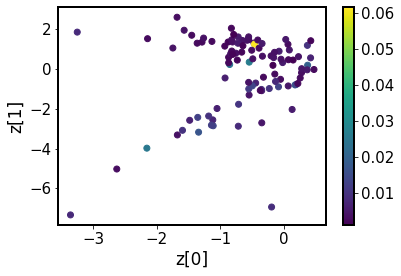

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['font.family'] = 'Sans'

load_weights_path = 'VAE_Embedding.ckpt'
vae = VAE(encoder, mlp, decoder)

plot_label_clusters_2D(vae, x_data, y_data, load_weights_path)